## 1121 Machine Learning HW2 Kaggle Competitions

### 通訊三 110503518 李秉宸

### Outline

本次挑選Kaggle上的House Prices競賽作為練習，一方面是與先前上課內容類似，以及課堂中老師有推薦到該競賽內容，另一方面是我認為目前較不熟悉的是篩選feature的部分，故發現到該競賽的資料內容很多，或許很適合訓練(但也很燒腦)。本次一樣使用Linear Regression方法以及已知的dataframe完成Kaggle競賽。

競賽連結：[House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniquesHouse)

資料集內容可參考附檔 data_description.txt (抱歉這真的太多，我也不知道怎麼解釋比較好)
<hr>

### Method

#### Step 1. 資料空值處理 / 類別處理
先使用df.info()初步確認train.csv內的缺值情況與資料型態，發現以下feature具有缺值，並進行以下處理：

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("./train.csv")
df.info()

# 用中位數填補空值
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True) # 因為LotFrontage不可能為0，所以用中位數填補
df['GarageYrBlt'].fillna(df['LotFrontage'].median(), inplace = True) # 因為GarageYrBlt不可能為0，所以用中位數填補

# 用0填補空值 (代表沒這項目，如沒有泳池或車庫，該項目相關數據則視為0)
df['Alley'].fillna(0, inplace = True)
df['MasVnrType'].fillna(0, inplace = True)
df['MasVnrArea'].fillna(0, inplace = True)
df['BsmtQual'].fillna(0, inplace = True)
df['BsmtCond'].fillna(0, inplace = True)
df['BsmtExposure'].fillna(0, inplace = True)
df['Electrical'].fillna(0, inplace = True)
df['FireplaceQu'].fillna(0, inplace = True)
df['GarageType'].fillna(0, inplace = True)
df['GarageFinish'].fillna(0, inplace = True)
df['GarageQual'].fillna(0, inplace = True)
df['GarageCond'].fillna(0, inplace = True)
df['PoolQC'].fillna(0, inplace = True)
df['Fence'].fillna(0, inplace = True)
df['MiscFeature'].fillna(0, inplace = True)

# 丟棄數據 (因為類別太多，不易分析)
df.drop(['BsmtFinType1'], axis = 1, inplace = True)
df.drop(['BsmtFinType2'], axis = 1, inplace = True)

# 檢查空值是否處理完畢
df.isnull().sum()

# 將類別資料轉換為數值
df = pd.get_dummies(data = df, dtype=int, columns = ['MSZoning'])
df = pd.get_dummies(data = df, dtype=int, columns = ['Street'])
df = pd.get_dummies(data = df, dtype=int, columns = ['Alley'])
# 下略


<hr>

#### Step 2. 分析資料關聯性

完成類別分項後，即開始計算關聯性。課堂中有提到可使用seaborn裡面的pairplot()對兩項數據作圖，觀察其關聯性，但該方法仍須以人眼觀察，我認為不易判定，故經上網查詢以及與修課同學討論，決定以numpy裡的corrcoef()計算關聯性(correlation)，若數值大於特定範圍(關聯性高於一定數值)，即採用該feature，程式如下：

In [ ]:
sns.pairplot(df[['feature_name', 'SalePrice']], dropna = True) #上課內容
np.corrcoef(df['feature_name'], df['SalePrice']) #本次作業使用內容

因feature過多，詳細整理結果請見hw2 feature_corre.pdf所整理之內容。本次僅採用相關性>=0.45 (取絕對值)的資料，共22個，分別為

| feature_name  |   feature_name    |
|:-------------:|:-----------------:|
| OverallQual   | ExterQual_Ex      |
| YearBuilt     | ExterQual_Gd      |
| YearRemodAdd  | ExterQual_TA      |
| MasVnrArea    | Foundation_PConc  |
| TotalBsmtSF   | BsmtQual_Ex       |
| 1stFlrSF      | BsmtQual_TA       |
| GrLivArea     | KitchenQual_Ex    |
| FullBath      | KitchenQual_TA    |
| TotRmsAbvGrd  | FireplaceQu_No    |
| Fireplaces    |                   |
| GarageYrBlt   |                   |
| GarageCars    |                   |
| GarageArea    |                   |


<hr>

#### Step 3. Train the model
開始訓練模型，以Linear Regression方式進行訓練，整體架構與課程內容類似，程式如下：

In [11]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import dataset
df = pd.read_csv("./train.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# 以下僅針對需要丟入訓練的feature進行整理
# dummies: ExterQual, Foundation, BsmtQual, KitchenQual, FireplaceQu, GarageFinish
df = pd.get_dummies(data = df, dtype=int, columns = ['ExterQual']) #Get Ex, Gd, TA
df = pd.get_dummies(data = df, dtype=int, columns = ['Foundation']) #Get PConc
df = pd.get_dummies(data = df, dtype=int, columns = ['BsmtQual']) #Get Ex, TA
df = pd.get_dummies(data = df, dtype=int, columns = ['KitchenQual']) #Get Ex, TA
df['FireplaceQu'].fillna('No' , inplace = True)
df = pd.get_dummies(data = df, dtype=int, columns = ['FireplaceQu']) #Get NA
df['GarageFinish'].fillna('No' , inplace = True)

# 補齊空值
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace = True)
df['MasVnrArea'].fillna(0, inplace = True)

# 再次檢查資料內容
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 100 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   int64  
 1   MSSubClass         1460 non-null   int64  
 2   MSZoning           1460 non-null   object 
 3   LotFrontage        1201 non-null   float64
 4   LotArea            1460 non-null   int64  
 5   Street             1460 non-null   object 
 6   Alley              91 non-null     object 
 7   LotShape           1460 non-null   object 
 8   LandContour        1460 non-null   object 
 9   Utilities          1460 non-null   object 
 10  LotConfig          1460 non-null   object 
 11  LandSlope          1460 non-null   object 
 12  Neighborhood       1460 non-null   object 
 13  Condition1         1460 non-null   object 
 14  Condition2         1460 non-null   object 
 15  BldgType           1460 non-null   object 
 16  HouseStyle         1460

In [13]:
# 因drop的話欄位太多，改用copy的方式
selected_columns = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'KitchenQual_Ex', 'KitchenQual_TA', 'FireplaceQu_No']]

# Prepare training data
X = selected_columns.copy()
y = df['SalePrice']

# 檢查X的資料內容
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OverallQual       1460 non-null   int64  
 1   YearBuilt         1460 non-null   int64  
 2   YearRemodAdd      1460 non-null   int64  
 3   MasVnrArea        1460 non-null   float64
 4   TotalBsmtSF       1460 non-null   int64  
 5   1stFlrSF          1460 non-null   int64  
 6   GrLivArea         1460 non-null   int64  
 7   FullBath          1460 non-null   int64  
 8   TotRmsAbvGrd      1460 non-null   int64  
 9   Fireplaces        1460 non-null   int64  
 10  GarageYrBlt       1460 non-null   float64
 11  GarageCars        1460 non-null   int64  
 12  GarageArea        1460 non-null   int64  
 13  ExterQual_Ex      1460 non-null   int32  
 14  ExterQual_Gd      1460 non-null   int32  
 15  ExterQual_TA      1460 non-null   int32  
 16  Foundation_PConc  1460 non-null   int32  


In [9]:
# Split to training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 67)

# Using Linear Regression Model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.8348770546636185

In [10]:
# Model Output
import joblib
joblib.dump(reg, 'reg_house_prices_20231111.pkl', compress=3)

['reg_house_prices_20231111.pkl']

<hr>

#### Step 4. Test the model and submit the result


In [14]:
# Model using
import joblib

model_pretrained = joblib.load('./reg_house_prices_20231111.pkl')
model_pretrained

# import modules
import pandas as pd

# import dataset
df_test = pd.read_csv("./house_prices_test.csv")

# 處理資料使其與training data一致
df_test = pd.get_dummies(data = df_test, dtype=int, columns = ['ExterQual']) #Get Ex, Gd, TA
df_test = pd.get_dummies(data = df_test, dtype=int, columns = ['Foundation']) #Get PConc
df_test = pd.get_dummies(data = df_test, dtype=int, columns = ['BsmtQual']) #Get Ex, TA
df_test = pd.get_dummies(data = df_test, dtype=int, columns = ['HeatingQC']) #Get Ex
df_test = pd.get_dummies(data = df_test, dtype=int, columns = ['KitchenQual']) #Get Ex, TA
df_test['FireplaceQu'].fillna('No' , inplace = True)
df_test = pd.get_dummies(data = df_test, dtype=int, columns = ['FireplaceQu']) #Get NA
df_test['GarageFinish'].fillna('No' , inplace = True)

df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median(), inplace = True)
df_test['MasVnrArea'].fillna(0, inplace = True)

# 以下資料經檢視後，發現testing data中有缺少的欄位，因此再補0
df_test['MasVnrArea'].fillna(0, inplace = True)
df_test['TotalBsmtSF'].fillna(0, inplace = True)
df_test['GarageCars'].fillna(0, inplace = True)
df_test['GarageArea'].fillna(0, inplace = True)

selected_columns = df_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'KitchenQual_Ex', 'KitchenQual_TA', 'FireplaceQu_No']]

df_submit = selected_columns.copy()
df_submit.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OverallQual       1459 non-null   int64  
 1   YearBuilt         1459 non-null   int64  
 2   YearRemodAdd      1459 non-null   int64  
 3   MasVnrArea        1459 non-null   float64
 4   TotalBsmtSF       1459 non-null   float64
 5   1stFlrSF          1459 non-null   int64  
 6   GrLivArea         1459 non-null   int64  
 7   FullBath          1459 non-null   int64  
 8   TotRmsAbvGrd      1459 non-null   int64  
 9   Fireplaces        1459 non-null   int64  
 10  GarageYrBlt       1459 non-null   float64
 11  GarageCars        1459 non-null   float64
 12  GarageArea        1459 non-null   float64
 13  ExterQual_Ex      1459 non-null   int32  
 14  ExterQual_Gd      1459 non-null   int32  
 15  ExterQual_TA      1459 non-null   int32  
 16  Foundation_PConc  1459 non-null   int32  


In [17]:
# Prediction
predictions2 = model_pretrained.predict(df_submit)

# Prepare submit file
forSubmissionDF = pd.DataFrame(columns = ['Id','SalePrice'])
forSubmissionDF['Id'] = range(1461, 2920) #Range 最後一個不會被包含，所以只到2919
forSubmissionDF['SalePrice'] = predictions2
forSubmissionDF

,Id,SalePrice
0,1461,100246.414962
1,1462,146070.036685
2,1463,167117.641519
3,1464,185539.483002
4,1465,201128.526161
...,...,...
1454,2915,79124.159655
1455,2916,93525.028341
1456,2917,151565.066227
1457,2918,108713.427139


In [18]:
# Generate the data for submission
forSubmissionDF.to_csv('house_prices_for_submission_20231111.csv', index = False)


<hr>

#### Step 5. Submit the result

經上傳Kaggle後，得分為0.16849

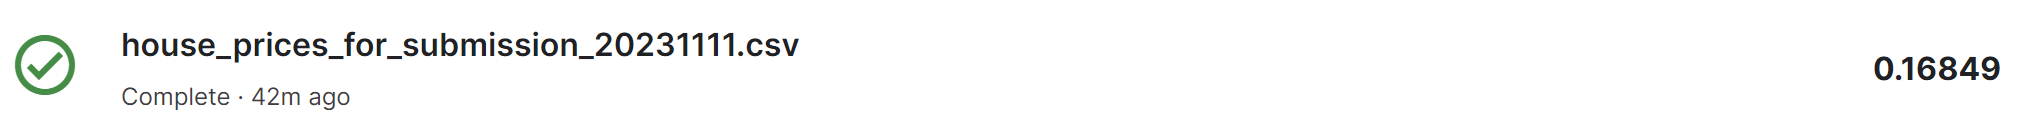

備註：最佳得分為0.16691，排名3378名，但該分數是在亂篩數據(自己主觀認定)的情況下發生的，並未經過正規的相關性整理，所以我認為只是運氣好QAQ

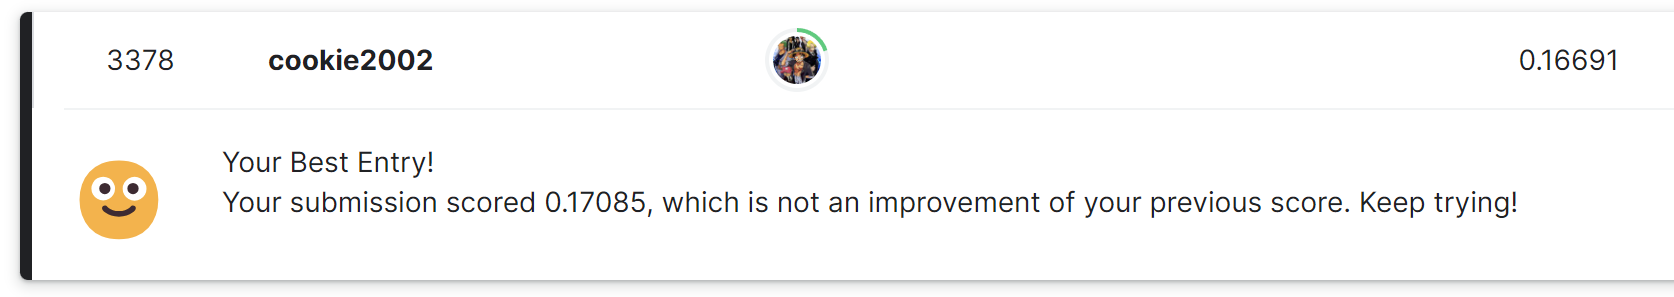

<hr>

### 遭遇問題

#### 1、資料量龐大問題
因這次的dataset相當龐大，且有許多專有名詞與分類，導致無法在第一時間就人工判定出所有feature對saleprice的相關性，花費較多時間在整理數據跟查詢分析方法。過程中一度drop到自己錯亂，最後經與同學討論後決定以copy方式選出要訓練的column較為方便。

#### 2、test_size跟random_state的問題
因HW1有嘗試改變test_size跟random_state以提高r2_score的分數，在此作業中我也有進行嘗試，得到最佳的情況為test_size = 0.21跟random_state = 95時，r2_score為0.8777655435929693，但上傳Kaggle後得分卻變差，只有0.17085，故最後仍採用講義預設的設定。

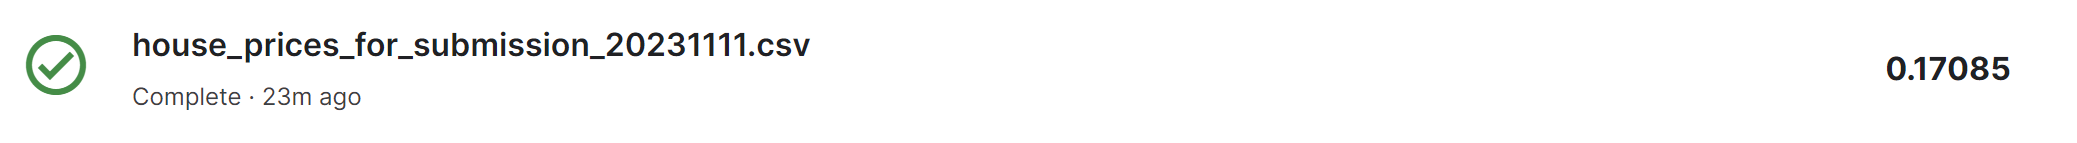

#### 3、可改善方向
此次作業花費較多時間在處理關聯性問題，像是到底要抓相關性前幾高的feature就好，或是高於某個相關性時都採用，考量到房價應該不能只由特定幾個項目決定價格，故選擇後者作為嘗試。但經過多次嘗試後，發現以0.45作為界線的Kaggle得分較高。也發現到在訓練模型中所得的r2_score與實際測驗結果分數並未成正相關，或許是篩選feature的方式仍要改善(如即使關聯性高，仍需剔除；或是部分feature的功能可能相同，如「總樓地板面積」與「分層樓地板面積之總和」相同，可能就只要取一個)，或是要改變訓練模型的方式！

<hr>

#### Reference
[1] https://realpython.com/numpy-scipy-pandas-correlation-python/
[2] https://www.adamsmith.haus/python/answers/how-to-copy-columns-to-a-new-pandas-dataframe-in-python